# Name: Dheeraj Chouhan

## Task :Decission Tree Prediction 
## level: Intermidiate 
### GRIP @ The Sparks Foundation


In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score,r2_score

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

## Data Frame

In [7]:
df = pd.read_csv('Iris.csv')
df = df.drop('Id',axis = 1)

In [8]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [91]:
df.shape

(150, 5)

## Data Visualization (comparing various features)

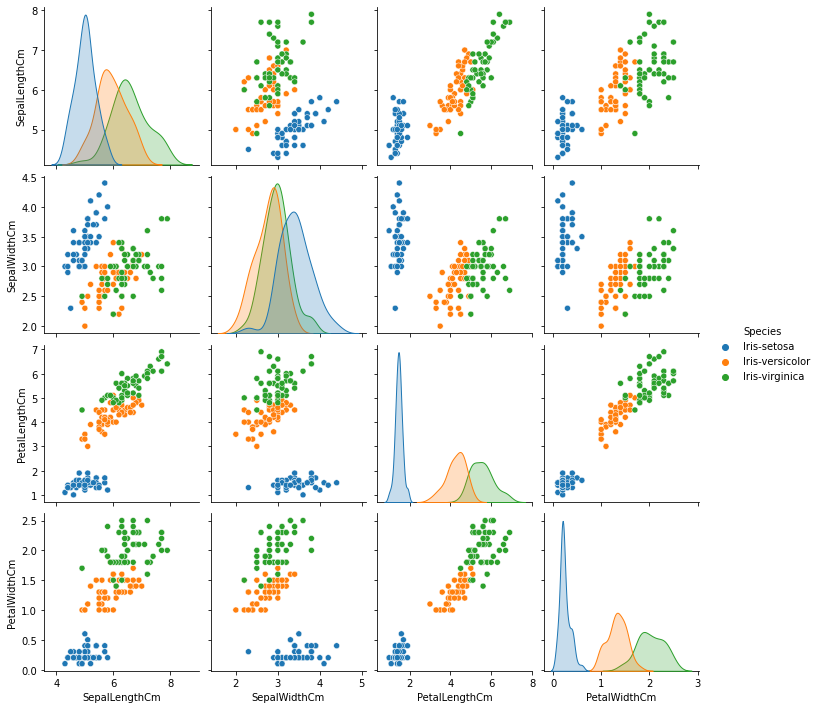

In [92]:
sns.pairplot(df,hue="Species")


## Split Dataset 

In [9]:

X = df.iloc[:,:4]
Y = df.iloc[:,-1]


### charactor encoding

In [10]:
def chartonum(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    elif x == 'Iris-virginica':
        return 2
def numtochr(x):
    if x == 0:
        return 'Iris-setosa'
    elif x == 1:
        return 'Iris-versicolor'
    elif x == 2:
        return 'Iris-virginica'

In [11]:
y = Y.apply(lambda x:chartonum(x))
y = np.array(y)

# Decision Tree Model Training

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(X_train,y_train)
print("Training Complete..")
y_pred = model.predict(X_test)
y_test,y_pred

Training Complete..


(array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1], dtype=int64),
 array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1], dtype=int64))

### Tree Entropy Image

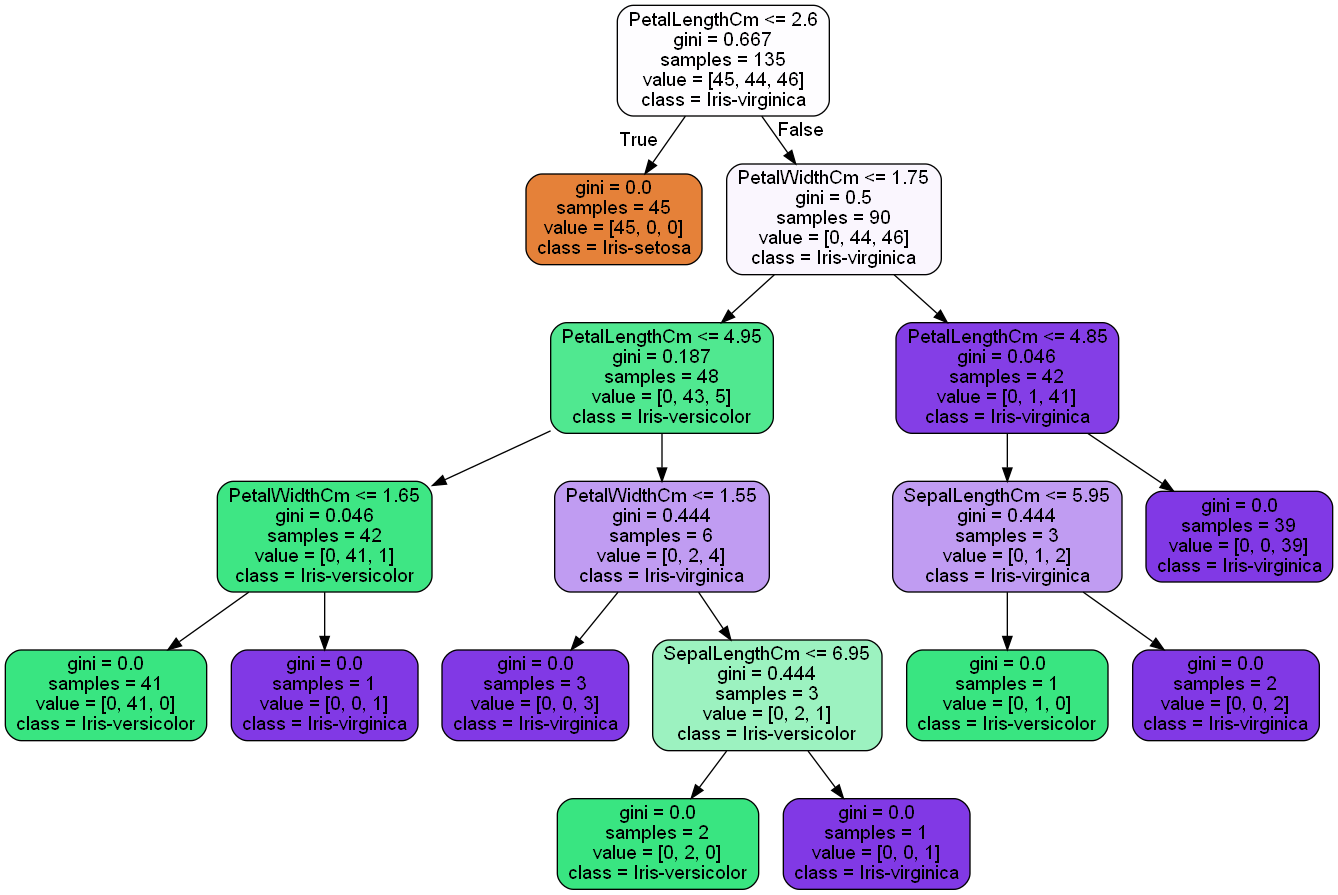

In [37]:
iris_feature  = list(X.columns)
iris_class = ['Iris-setosa','Iris-versicolor','Iris-virginica']

export_graphviz(
        model,
        out_file="desision_tree.dot",
        feature_names=iris_feature,
        class_names=iris_class,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('desision_tree.dot')
graph.write_png('desision_tree.png')

Image(filename='desision_tree.png') 

### Predicting class for some random of petal and sepal length and width

In [38]:
# Estimating class probabilities

print('''Estimating Class Probabilities for flower whose petals length widthare 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm''' )

output = model.predict([[4.7, 3.2, 1.3, 0.2]])
print(f"Our model predicts the class is {numtochr(output)}")

Estimating Class Probabilities for flower whose petals length widthare 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm
Our model predicts the class is Iris-setosa


c:\users\dheeraj chouhan\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Calculating model accuracy 

In [39]:
print("Model Accuracy:",round(accuracy_score(y_test, y_pred),2))
print('Model score',r2_score(y_test,y_pred))

Model Accuracy: 1.0
Model score 1.0


The accuracy of model is coming out 100% ,Although we train our model with 90% of data, That's not good, It will result overfiiting but as far for this dataset it will work.